## Complex CNN Model

Epoch 1/40
54/54 [==============================] - 7s 91ms/step - loss: 4.9559 - accuracy: 0.4681
Epoch 2/40
54/54 [==============================] - 5s 90ms/step - loss: 0.7771 - accuracy: 0.6333
Epoch 3/40
54/54 [==============================] - 5s 87ms/step - loss: 0.7045 - accuracy: 0.6709
Epoch 4/40
54/54 [==============================] - 5s 88ms/step - loss: 0.6385 - accuracy: 0.7132
Epoch 5/40
54/54 [==============================] - 5s 93ms/step - loss: 0.5677 - accuracy: 0.7410
Epoch 6/40
54/54 [==============================] - 5s 88ms/step - loss: 0.5115 - accuracy: 0.7827
Epoch 7/40
54/54 [==============================] - 5s 87ms/step - loss: 0.5553 - accuracy: 0.7503
Epoch 8/40
54/54 [==============================] - 5s 93ms/step - loss: 0.4033 - accuracy: 0.8308
Epoch 9/40
54/54 [==============================] - 5s 97ms/step - loss: 0.4295 - accuracy: 0.8134
Epoch 10/40
54/54 [==============================] - 6s 112ms/step - loss: 0.4100 - accuracy: 0.8366
Epoch 11

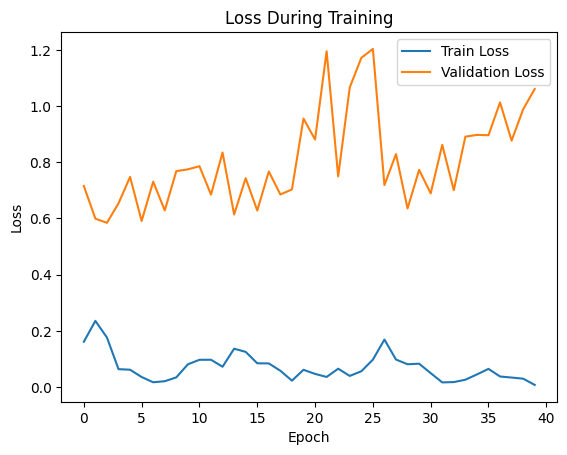

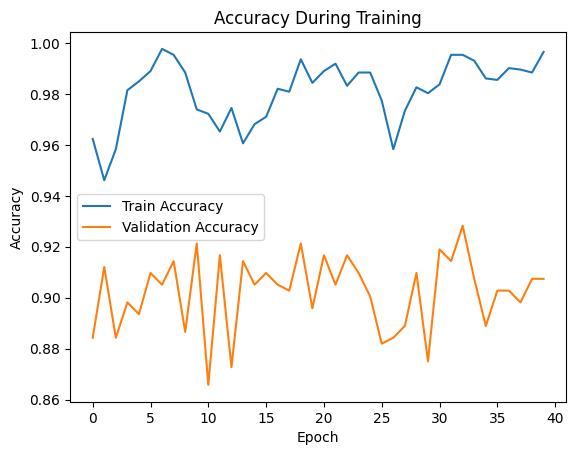

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import cv2
import matplotlib.pyplot as plt
import os

# Set the paths to your image directories
sphere_datadir = r"D:\Sampoerna University\IoT & SU Project\AI Delta Robot\Data Sets\DataSets - 3D\Sphere"
cube_datadir = r"D:\Sampoerna University\IoT & SU Project\AI Delta Robot\Data Sets\DataSets - 3D\Cube"
cylinder_datadir = r"D:\Sampoerna University\IoT & SU Project\AI Delta Robot\Data Sets\DataSets - 3D\Cylinder"

CATEGORIES = ["Sphere", "Cube", "Cylinder"]

# Function to load and preprocess image data using OpenCV
def load_data(datadir, label):
    X = []
    y = []
    for img in os.listdir(datadir):
        img_array = cv2.imread(os.path.join(datadir, img), cv2.IMREAD_COLOR)
        resized_img = cv2.resize(img_array, (64, 64))  # Resize images to (64, 64)
        X.append(resized_img)
        y.append(label)
    return np.array(X), y

# Load and preprocess image data from different directories
X_sphere, y_sphere = load_data(sphere_datadir, 0)
X_cube, y_cube = load_data(cube_datadir, 1)
X_cylinder, y_cylinder = load_data(cylinder_datadir, 2)

X = np.concatenate((X_sphere, X_cube, X_cylinder), axis=0)
y = np.concatenate((y_sphere, y_cube, y_cylinder), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a more complex Convolutional Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model  
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=40, batch_size=32)

# Evaluate the model's performance on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Perform predictions on the testing data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Print a confusion matrix for evaluating the model's prediction results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


# Train the model and store the history
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Plot history loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

# Plot history accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy During Training')
plt.show()